In [2]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Declaring the names of the columns we're interested in

In [3]:
columnas=['DP','DPNOM','DPMP','MPIO','AÑO','ÁREA GEOGRÁFICA']+[str(5*i)+"_"+str(5*(i+1)) for i in range(20)]+["Mujeres_100"]


# Reading the population by genre an municipalities for the period considered

df_1995_2004=pd.DataFrame(pd.read_excel("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.xlsx"))
df_2004_2017=pd.DataFrame(pd.read_excel("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.xlsx"))
df_2018=pd.DataFrame(pd.read_excel("anexo-proyecciones-poblacion-Municipal_2018-2026.xlsx"))

In [4]:
df_1995_2004=pd.DataFrame(pd.read_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.csv"))
df_2004_2017=pd.DataFrame(pd.read_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.csv"))
df_2018=pd.DataFrame(pd.read_csv("anexo-proyecciones-poblacion-Municipal_2018-2026.csv"))

df_1995_2004.to_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.csv")
df_2004_2017.to_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.csv")
df_2018.to_csv("anexo-proyecciones-poblacion-Municipal_2018-2026.csv")



# Standardizing the names and codes of the municipalities, filtering data associated to the whole municipalities.

In [5]:
df_1995_2004=df_1995_2004[df_1995_2004['ÁREA GEOGRÁFICA']=="Total"].copy()
df_1995_2004.DPMP=df_1995_2004.DPMP.apply(lambda x: str(x).zfill(5))

In [6]:
df_2004_2017=df_2004_2017[df_2004_2017['ÁREA GEOGRÁFICA']=="Total"].copy()
df_2004_2017.DPMP=df_2004_2017.DPMP.apply(lambda x: str(x).zfill(5))

In [7]:
df_2018=df_2018[df_2018['ÁREA GEOGRÁFICA']=="Total"].copy()
df_2018.DPMP=df_2018.DPMP.apply(lambda x: str(x).zfill(5))


# Selecting data associated to woman populations during the time horizon considered

In [8]:
for i in range(20): 
    df_1995_2004[str(5*i)+"_"+str(5*(i+1))]=sum(df_1995_2004["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))


In [9]:
for i in range(20): 
    df_2004_2017[str(5*i)+"_"+str(5*(i+1))]=sum(df_2004_2017["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))

In [10]:
for i in range(20): 
    df_2018[str(5*i)+"_"+str(5*(i+1))]=sum(df_2018["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))

# Selecting the subset of columns we are interested in

In [11]:
df_1995_2004=df_1995_2004[columnas]
df_2004_2017=df_2004_2017[columnas]
df_2018=df_2018[columnas]

# Concatenating dataframes and saving it to an external file for further processing (if necessary)

In [25]:
df=pd.concat([df_1995_2004,df_2004_2017,df_2018])
df.to_csv("output_files/población_por_grupo.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'output_files/población_por_grupo.csv'

In [13]:
df["Total"]=sum(df[str(5*i)+"_"+str(5*(i+1))] for i in range(20))+df["Mujeres_100"]
df

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,0_5,5_10,10_15,15_20,...,60_65,65_70,70_75,75_80,80_85,85_90,90_95,95_100,Mujeres_100,Total
0,5,Antioquia,05001,Medellín,1995,Total,87865,85949,84068,80847,...,24672,20169,14980,10543,6477,3342,1573,582,250,941748
1,5,Antioquia,05001,Medellín,1996,Total,88320,87597,84741,83325,...,25075,20797,15622,11147,6839,3495,1602,574,240,959265
2,5,Antioquia,05001,Medellín,1997,Total,88319,88993,85300,85540,...,25539,21392,16316,11728,7158,3705,1621,574,237,974987
3,5,Antioquia,05001,Medellín,1998,Total,88162,90335,86309,87523,...,26166,21949,17021,12315,7430,3924,1649,585,235,991843
4,5,Antioquia,05001,Medellín,1999,Total,87698,91439,87795,89112,...,26943,22456,17727,12577,7974,4099,1670,589,226,1008226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,99,Vichada,99773,Cumaribo,2022,Total,5136,5077,5009,4613,...,716,494,345,193,112,50,19,7,7,38063
10094,99,Vichada,99773,Cumaribo,2023,Total,5144,4985,4974,4667,...,748,517,370,207,121,56,18,7,7,38495
10095,99,Vichada,99773,Cumaribo,2024,Total,5021,4885,5024,4783,...,768,539,378,210,104,41,12,3,1,39022
10096,99,Vichada,99773,Cumaribo,2025,Total,5046,4810,4994,4835,...,792,572,393,231,108,43,13,2,1,39590


## Limiting the dataframe to contain information only for the time period being considered in this research

In [14]:
df=df[df["AÑO"].isin([ano for ano in range(1998,2019)])].copy()

## Changing the name of the columns to correspond to those of the Cancer datasets (age group)

In [15]:
df.columns=['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', '0_5', '5_10',
       '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28','Total']

# All information for age groups over 25 are associated (summed up) to the latter.

In [16]:
df["25"]=sum([df["25"],df["26"],df["27"],df["28"]])

# Keeping information for the age groups of interest

In [17]:
df=df[['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', 
       '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25','Total']].copy()

# Exclusión de municipios no considerados para este análisis

In [18]:
excluded=['13490', '17495', '19300', '19785', '19845', '23682', '23815',
       '27150', '27160', '27425', '27430', '27450', '27580', '27600',
       '27810', '44035', '44420', '47030', '47205', '47460', '47660',
       '47720', '47960', '47980', '52254', '52480', '70221', '91263',
       '91405', '91407', '91430', '91460', '91530', '91536', '91669',
       '91798', '94343', '94663', '94883', '94884', '94885', '94886',
       '94887', '94888', '97511', '97777', '97889']
df=df[~df.DPMP.isin(excluded)].copy()

In [19]:
len(df.DPMP.unique())

1075

In [20]:
lista_with_excluded=list(df.DPMP.unique())
print(lista_with_excluded)

['05001', '05002', '05004', '05021', '05030', '05031', '05034', '05036', '05038', '05040', '05042', '05044', '05045', '05051', '05055', '05059', '05079', '05086', '05088', '05091', '05093', '05101', '05107', '05113', '05120', '05125', '05129', '05134', '05138', '05142', '05145', '05147', '05148', '05150', '05154', '05172', '05190', '05197', '05206', '05209', '05212', '05234', '05237', '05240', '05250', '05264', '05266', '05282', '05284', '05306', '05308', '05310', '05313', '05315', '05318', '05321', '05347', '05353', '05360', '05361', '05364', '05368', '05376', '05380', '05390', '05400', '05411', '05425', '05440', '05467', '05475', '05480', '05483', '05490', '05495', '05501', '05541', '05543', '05576', '05579', '05585', '05591', '05604', '05607', '05615', '05628', '05631', '05642', '05647', '05649', '05652', '05656', '05658', '05659', '05660', '05664', '05665', '05667', '05670', '05674', '05679', '05686', '05690', '05697', '05736', '05756', '05761', '05789', '05790', '05792', '05809', 

# Creating an auxiliar ID that will be later used for joining the population data set to the Cancer data set

In [21]:
df["id"]=df.apply(lambda x: str(x.AÑO)+"-"+str(x.DPMP),axis=1)

# Reading the Cancer data set and Joining Tables

In [24]:
df_mort=pd.read_csv("output_files/Cancer_1998_2018.csv")
df_mort["codmunicipio"]=df_mort.apply(lambda x: str(x.codptore).zfill(2)+str(x.codmunre).zfill(3),axis=1)
df_mort=df_mort.astype({'ano': 'int32',"area_res":'float32'})
df_mort=pd.DataFrame(pd.pivot_table(df_mort,values='gru_ed2',index=["codmunicipio",'ano'], columns=["gru_ed1"], aggfunc="count").fillna(0).reset_index())

FileNotFoundError: [Errno 2] No such file or directory: 'output_files/Cancer_1998_2018.csv'

In [22]:
df_mort=df_mort[~df_mort.codmunicipio.isin(excluded)].copy()

# Creating an auxiliar ID to join DataFrames

In [23]:
df_mort["id"]=df_mort.apply(lambda x: str(x.ano)+"-"+str(x.codmunicipio),axis=1)

In [24]:
df_both=df.merge(df_mort,how="left",on="id").fillna(0)

## Computing the mortality rates for each group

In [25]:
for i in range(10,26):
    df_both["tasa_"+str(i)]=df_both[i]/df_both[str(i)]*100000

In [26]:
df_both.sort_values(by=["DPMP","AÑO"]).head(21)

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,13,...,tasa_16,tasa_17,tasa_18,tasa_19,tasa_20,tasa_21,tasa_22,tasa_23,tasa_24,tasa_25
0,5,Antioquia,05001,Medellín,1998,Total,86309,87523,82886,85891,...,8.643167,21.319310,37.546657,23.513506,64.969808,63.784227,64.626050,105.562322,80.753701,62.568434
1,5,Antioquia,05001,Medellín,1999,Total,87795,89112,84462,84151,...,13.898347,35.854533,29.580798,64.202769,29.692313,62.344140,78.975574,95.412260,112.866817,91.130012
2,5,Antioquia,05001,Medellín,2000,Total,89643,90256,86793,82865,...,26.862584,32.833714,40.495667,58.312129,57.208238,35.174112,55.190684,61.943477,131.233596,147.405660
3,5,Antioquia,05001,Medellín,2001,Total,91471,90985,89390,82136,...,14.305221,25.237787,23.307307,47.801147,23.905471,52.189797,43.523203,105.389943,56.689342,85.178876
4,5,Antioquia,05001,Medellín,2002,Total,93120,91592,91773,82112,...,10.101265,22.740710,27.941807,40.636803,68.308233,46.772685,95.450207,94.209725,129.673655,163.154317
5,5,Antioquia,05001,Medellín,2003,Total,94451,92407,93721,82940,...,15.971497,30.614030,33.943118,61.450225,74.147306,66.145769,82.811449,118.665364,61.804697,143.005720
6,5,Antioquia,05001,Medellín,2004,Total,95450,93538,95159,84606,...,11.986240,23.868024,37.667363,52.127452,70.296711,52.022890,50.776886,54.233611,111.663790,155.242417
7525,5,Antioquia,05001,Medellín,2005,Total,92223,93032,95957,87566,...,6.935775,18.521949,18.970233,37.631214,37.057625,80.698408,76.602672,38.336209,96.404126,144.188110
7526,5,Antioquia,05001,Medellín,2006,Total,92454,94632,96542,90310,...,15.921575,20.466639,31.822521,45.484696,55.137845,55.994960,98.568411,112.528132,65.292417,136.168430
7527,5,Antioquia,05001,Medellín,2007,Total,92327,96208,97122,92865,...,12.396042,19.836842,26.171540,34.468996,49.926299,59.870281,73.290275,103.981895,90.057637,139.220366


In [27]:
df_both.to_csv("TasasAjustadas.csv")

## Creating a dictionary based on the weights corresponding to each age group according to the WHO (2000 - 2025) Note: Does not sum 100 because it was not necessary to keep the age groups below 10, provided there were no information about breast cancer in the studied period

In [28]:
df_both=pd.read_csv("TasasAjustadas.csv")

In [29]:
diccionario={10: 8.60,
11: 8.47,
12: 8.22,
13: 7.93,
14: 7.61,
15: 7.15,
16: 6.59,
17 :6.04,
18 :5.37,
19 :4.55,
20 :3.72,
21 :2.96,
22 :2.21,
23 :1.52,
24 :0.91,
25 :0.44+0.15+0.04+0.005}

### Adjusting mortality rate by age (direct method)

In [30]:
df_both["TEA"]=sum(df_both["tasa_"+str(i)]*diccionario[i]/100 for i in range(10,25))


In [31]:
df_both

,Unnamed: 0,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,...,tasa_17,tasa_18,tasa_19,tasa_20,tasa_21,tasa_22,tasa_23,tasa_24,tasa_25,TEA
0,0,5,Antioquia,5001,Medellín,1998,Total,86309,87523,82886,...,21.319310,37.546657,23.513506,64.969808,63.784227,64.626050,105.562322,80.753701,62.568434,13.607379
1,1,5,Antioquia,5001,Medellín,1999,Total,87795,89112,84462,...,35.854533,29.580798,64.202769,29.692313,62.344140,78.975574,95.412260,112.866817,91.130012,15.519162
2,2,5,Antioquia,5001,Medellín,2000,Total,89643,90256,86793,...,32.833714,40.495667,58.312129,57.208238,35.174112,55.190684,61.943477,131.233596,147.405660,15.687747
3,3,5,Antioquia,5001,Medellín,2001,Total,91471,90985,89390,...,25.237787,23.307307,47.801147,23.905471,52.189797,43.523203,105.389943,56.689342,85.178876,12.235044
4,4,5,Antioquia,5001,Medellín,2002,Total,93120,91592,91773,...,22.740710,27.941807,40.636803,68.308233,46.772685,95.450207,94.209725,129.673655,163.154317,15.235940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,22570,97,Vaupés,97666,Taraira,2018,Total,161,140,78,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22571,22571,99,Vichada,99001,Puerto Carreño,2018,Total,977,950,922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22572,22572,99,Vichada,99524,La Primavera,2018,Total,585,483,401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22573,22573,99,Vichada,99624,Santa Rosalía,2018,Total,253,200,162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


df_out=df_both[df_both["AÑO"]==2018][["DPMP","TEA"]].copy()
df_out.DPMP=df_out.DPMP.apply(lambda x: str(x).zfill(5) )
df_out.to_csv("TEA_2018.csv")
df_out


# Computando la tasa ajustada de mortalidad por quinquenio

Agregando una variable llamada periodo de acuerdo al año evaluado.

In [32]:
df_both["periodo"]=pd.cut(df_both.AÑO, bins=[0, 2002, 2007, 2012, 100000], labels='1998-2002 2003-2007 2008-2012 2013-2018'.split())
df_both=df_both[['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA','periodo','TEA']].copy()
df_both.DPMP=df_both.DPMP.apply(lambda x: str(int(x)).zfill(5))

# Se genera un nuevo dataframe que asocia municipios, años y tasas de mortalidad para posteriormente unirlo con las variables socioeconómicas.

In [33]:
df_out=pd.DataFrame(df.DPMP.unique())
df_out.columns=["DPMP"]

for y in list(df_both["AÑO"].unique()):
    df_out[y]=df_out.DPMP.map(df_both[df_both["AÑO"]==y].set_index("DPMP")["TEA"])

df_out.DPMP=df_out.DPMP.apply(lambda x: str(int(x)).zfill(5))
    


In [34]:
df_hernan=pd.DataFrame(pd.read_csv("BD_MUNICIPIOS_RED_VAR.csv"))
df_hernan=df_hernan.dropna().copy()
df_hernan=df_hernan.fillna(-1)
df_hernan.DPMP=df_hernan.DPMP.astype(int).apply(lambda x: str(int(x)).zfill(5))
df_out=df_out.merge(df_hernan,how="left", on="DPMP")
df_out.dropna().to_csv("TAE_&_Hernan.csv")

In [35]:
len(set(final))

NameError: name 'final' is not defined

In [36]:
final=set(df_out.dropna().DPMP.unique())
set_extra=set(lista_with_excluded).difference(final)
set_extra

{'13458',
 '13655',
 '19050',
 '19533',
 '27050',
 '27250',
 '50325',
 '52696',
 '85015',
 '85279',
 '85315',
 '91540',
 '95200',
 '97161',
 '97666',
 '99524'}

In [39]:
df_out[df_out.DPMP.isin(set_extra)][["DPMP","MPIO"]]

,DPMP,MPIO
169,13458,NaN
179,13655,NaN
361,19050,NaN
383,19533,NaN
570,27050,NaN
578,27250,NaN
675,50325,NaN
745,52696,NaN
1029,85015,Chámeza
1038,85279,Recetor


In [46]:
print(list(colombia[colombia.MPIOS.isin(set_extra)].NOMBRE_CAB))

16

In [40]:
import geopandas as gpd
colombia=gpd.read_file("mpio/mpio.shp")
colombia

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.333941e+09,211788.556842,1122,361,05,ANTIOQUIA,480,MUTATA,MUTATA,CM,05480,ZONA02,DAMED,DAMEDZONA02,133394.129,"POLYGON ((704986.838 1318357.371, 716584.555 1..."
1118,2.816016e+09,359760.445480,1123,287,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,CM,27150,ZONA02,DAMED,DAMEDZONA02,281601.625,"POLYGON ((689343.717 1293927.217, 689505.362 1..."
1119,2.727328e+07,40602.945357,4,994,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,001,SAN ANDRES,SAN ANDRES,CM,88001,ZONA08,DABAR,DABARZONA08,2727.328,"POLYGON ((168440.793 1896450.410, 168454.340 1..."
1120,1.293062e+06,5955.813895,1098,995,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,564,SANTA CATALINA,SANTA CATALINA,CM,88000,ZONA08,DABAR,DABARZONA08,129.306,"POLYGON ((208230.889 1983876.766, 208230.084 1..."


In [71]:
df_both.groupby(["periodo"]).agg(["mean","std"])["TEA"]

,mean,std
periodo,,
1998-2002,5.561353,13.679467
2003-2007,5.883396,11.886760
2008-2012,6.406973,12.348964
2013-2018,6.933089,11.767666


In [74]:
df_both.columns

Index(['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', 'periodo',
       'TEA'],
      dtype='object')

In [81]:
out=df_both.groupby(["DPMP","periodo"]).agg("mean")[["TEA"]].reset_index()
#out.set_index("DPMP").T.to_dict()


In [82]:
out

,DPMP,periodo,TEA
0,05001,1998-2002,14.457054
1,05001,2003-2007,14.429498
2,05001,2008-2012,14.321613
3,05001,2013-2018,14.687949
4,05002,1998-2002,0.000000
...,...,...,...
4295,99624,2013-2018,0.000000
4296,99773,1998-2002,0.000000
4297,99773,2003-2007,0.000000
4298,99773,2008-2012,1.192661


array([[<AxesSubplot:title={'center':'TEA'}>]], dtype=object)

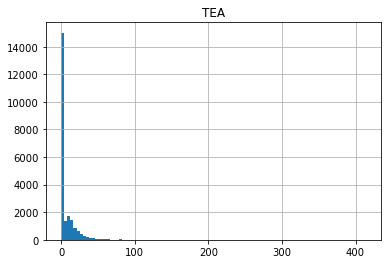

In [83]:
df_both.hist(column="TEA",bins=100)

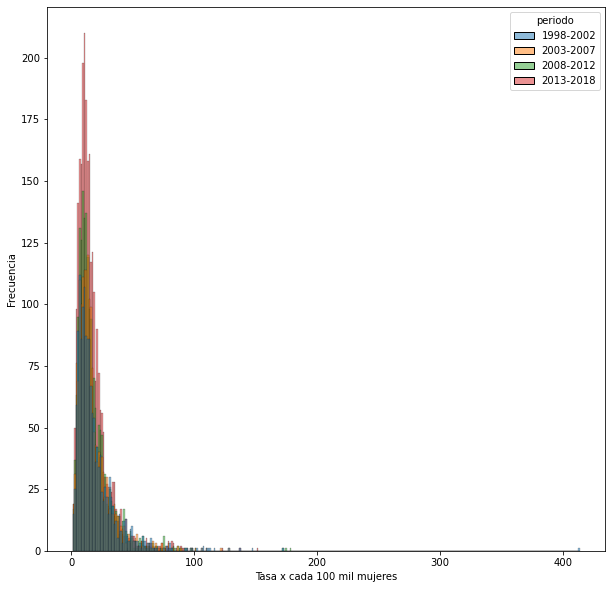

In [84]:
fig,ax=plt.subplots(figsize=(10,10))
sns.histplot(data=df_both[df_both.TEA>0],x="TEA",hue="periodo")
ax.set(xlabel='Tasa x cada 100 mil mujeres', ylabel='Frecuencia')
plt.show()

In [85]:
delta_tasa=df_both[(df_both["AÑO"].isin([1998,2018]))].pivot(index=['DPMP','MPIO'],columns='periodo')[['TEA']]
delta_tasa["delta"]=(delta_tasa["TEA"]["2013-2018"]-delta_tasa["TEA"]["1998-2002"])
delta_tasa=delta_tasa.sort_values(by="delta",ascending=False).reset_index()
delta_tasa

DPMP              MPIO         TEA                  delta
periodo                            1998-2002  2013-2018            
0        68169            Charta    0.000000  79.397590   79.397590
1        15537        Paz de Río    0.000000  71.527548   71.527548
2        54553  Puerto Santander    0.000000  66.095571   66.095571
3        15500            Oicatá    0.000000  61.486486   61.486486
4        13160        Cantagallo    0.000000  58.461538   58.461538
...        ...               ...         ...        ...         ...
1070     68344              Hato  105.694444   0.000000 -105.694444
1071     85015           Chámeza         NaN   0.000000         NaN
1072     85279           Recetor         NaN   0.000000         NaN
1073     91540     Puerto Nariño         NaN   0.000000         NaN
1074     97161            Carurú         NaN   0.000000         NaN

[1075 rows x 5 columns]

<AxesSubplot:xlabel='periodo', ylabel='TEA'>

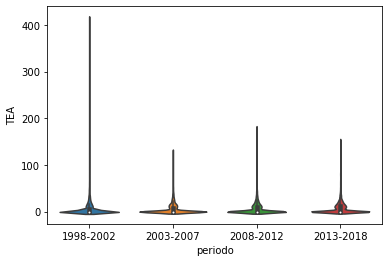

In [86]:
sns.violinplot(data=df_both,x="periodo",y="TEA")

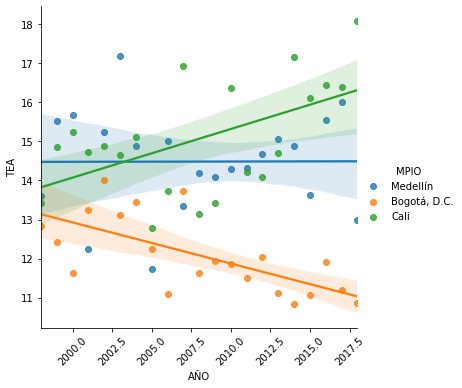

In [87]:
sns.lmplot(data=df_both[df_both.DPMP.isin(["05001","76001","11001"])],x="AÑO",y="TEA",hue="MPIO")
plt.xticks(rotation=45)
plt.show()

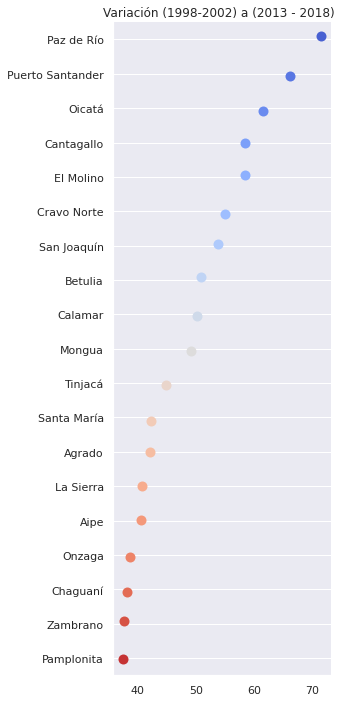

In [88]:

#delta_tasa.MPIO=delta_tasa.MPIO.apply(lambda x: str(x).capitalize())
sns.set(style="darkgrid")

#fg, ax = plt.subplots(figsize = (11,9))

g = sns.PairGrid(delta_tasa.sort_values(by="delta",ascending=False)[1:20], x_vars = 'delta', y_vars = 'MPIO', height = 10, aspect = .4)

g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')

g.set(xlabel='', ylabel='')

titles = ['Variación (1998-2002) a (2013 - 2018)  ']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

In [89]:
df_total=pd.read_csv("TasasAjustadas.csv")
df_total

,Unnamed: 0,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,...,tasa_16,tasa_17,tasa_18,tasa_19,tasa_20,tasa_21,tasa_22,tasa_23,tasa_24,tasa_25
0,0,5,Antioquia,5001,Medellín,1998,Total,86309,87523,82886,...,8.643167,21.319310,37.546657,23.513506,64.969808,63.784227,64.626050,105.562322,80.753701,62.568434
1,1,5,Antioquia,5001,Medellín,1999,Total,87795,89112,84462,...,13.898347,35.854533,29.580798,64.202769,29.692313,62.344140,78.975574,95.412260,112.866817,91.130012
2,2,5,Antioquia,5001,Medellín,2000,Total,89643,90256,86793,...,26.862584,32.833714,40.495667,58.312129,57.208238,35.174112,55.190684,61.943477,131.233596,147.405660
3,3,5,Antioquia,5001,Medellín,2001,Total,91471,90985,89390,...,14.305221,25.237787,23.307307,47.801147,23.905471,52.189797,43.523203,105.389943,56.689342,85.178876
4,4,5,Antioquia,5001,Medellín,2002,Total,93120,91592,91773,...,10.101265,22.740710,27.941807,40.636803,68.308233,46.772685,95.450207,94.209725,129.673655,163.154317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,22570,97,Vaupés,97666,Taraira,2018,Total,161,140,78,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22571,22571,99,Vichada,99001,Puerto Carreño,2018,Total,977,950,922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22572,22572,99,Vichada,99524,La Primavera,2018,Total,585,483,401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22573,22573,99,Vichada,99624,Santa Rosalía,2018,Total,253,200,162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='AÑO', ylabel='TEA'>

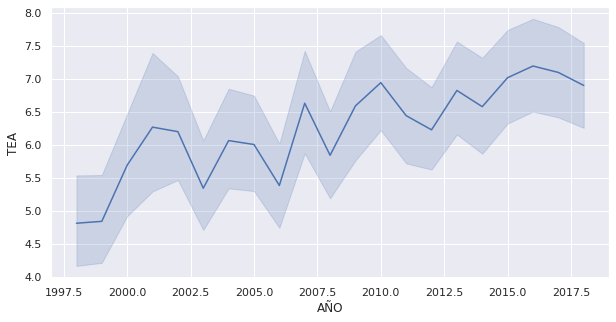

In [90]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=df_both,x="AÑO",y="TEA",ax=ax)

In [91]:
df_both[["DPMP","periodo","TEA"]].to_csv("join_with_map.csv")
df_both[["DPMP","periodo","TEA"]].DPMP.value_counts()

13657    21
18029    21
68524    21
25168    21
11001    21
         ..
27006    21
54680    21
52352    21
54871    21
25645    21
Name: DPMP, Length: 1075, dtype: int64

In [92]:
df_both[["DPMP","periodo","TEA"]]

,DPMP,periodo,TEA
0,05001,1998-2002,13.607379
1,05001,1998-2002,15.519162
2,05001,1998-2002,15.687747
3,05001,1998-2002,12.235044
4,05001,1998-2002,15.235940
...,...,...,...
22570,97666,2013-2018,0.000000
22571,99001,2013-2018,0.000000
22572,99524,2013-2018,0.000000
22573,99624,2013-2018,0.000000
